# Explorasi Data


### Import Library yang Diperlukan
Import semua library yang dibutuhkan. pandas untuk data, psycopg2 untuk DB, numpy dan scipy untuk stats, matplotlib untuk plot. Tambahkan !pip install ... jika library belum ada.

In [1]:
%pip install pandas sqlalchemy psycopg2-binary python-dotenv numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\ahabi\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import psycopg2
from psycopg2 import sql
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Koneksi Power BI dengan PostgreSQL menggunakan script python

1.  Buka Power BI dan Tambah Data Source
2.  Buka Power BI Desktop.
3.  Klik Home > Get Data > More....
4.  Cari PostgreSQL database → pilih Connect.

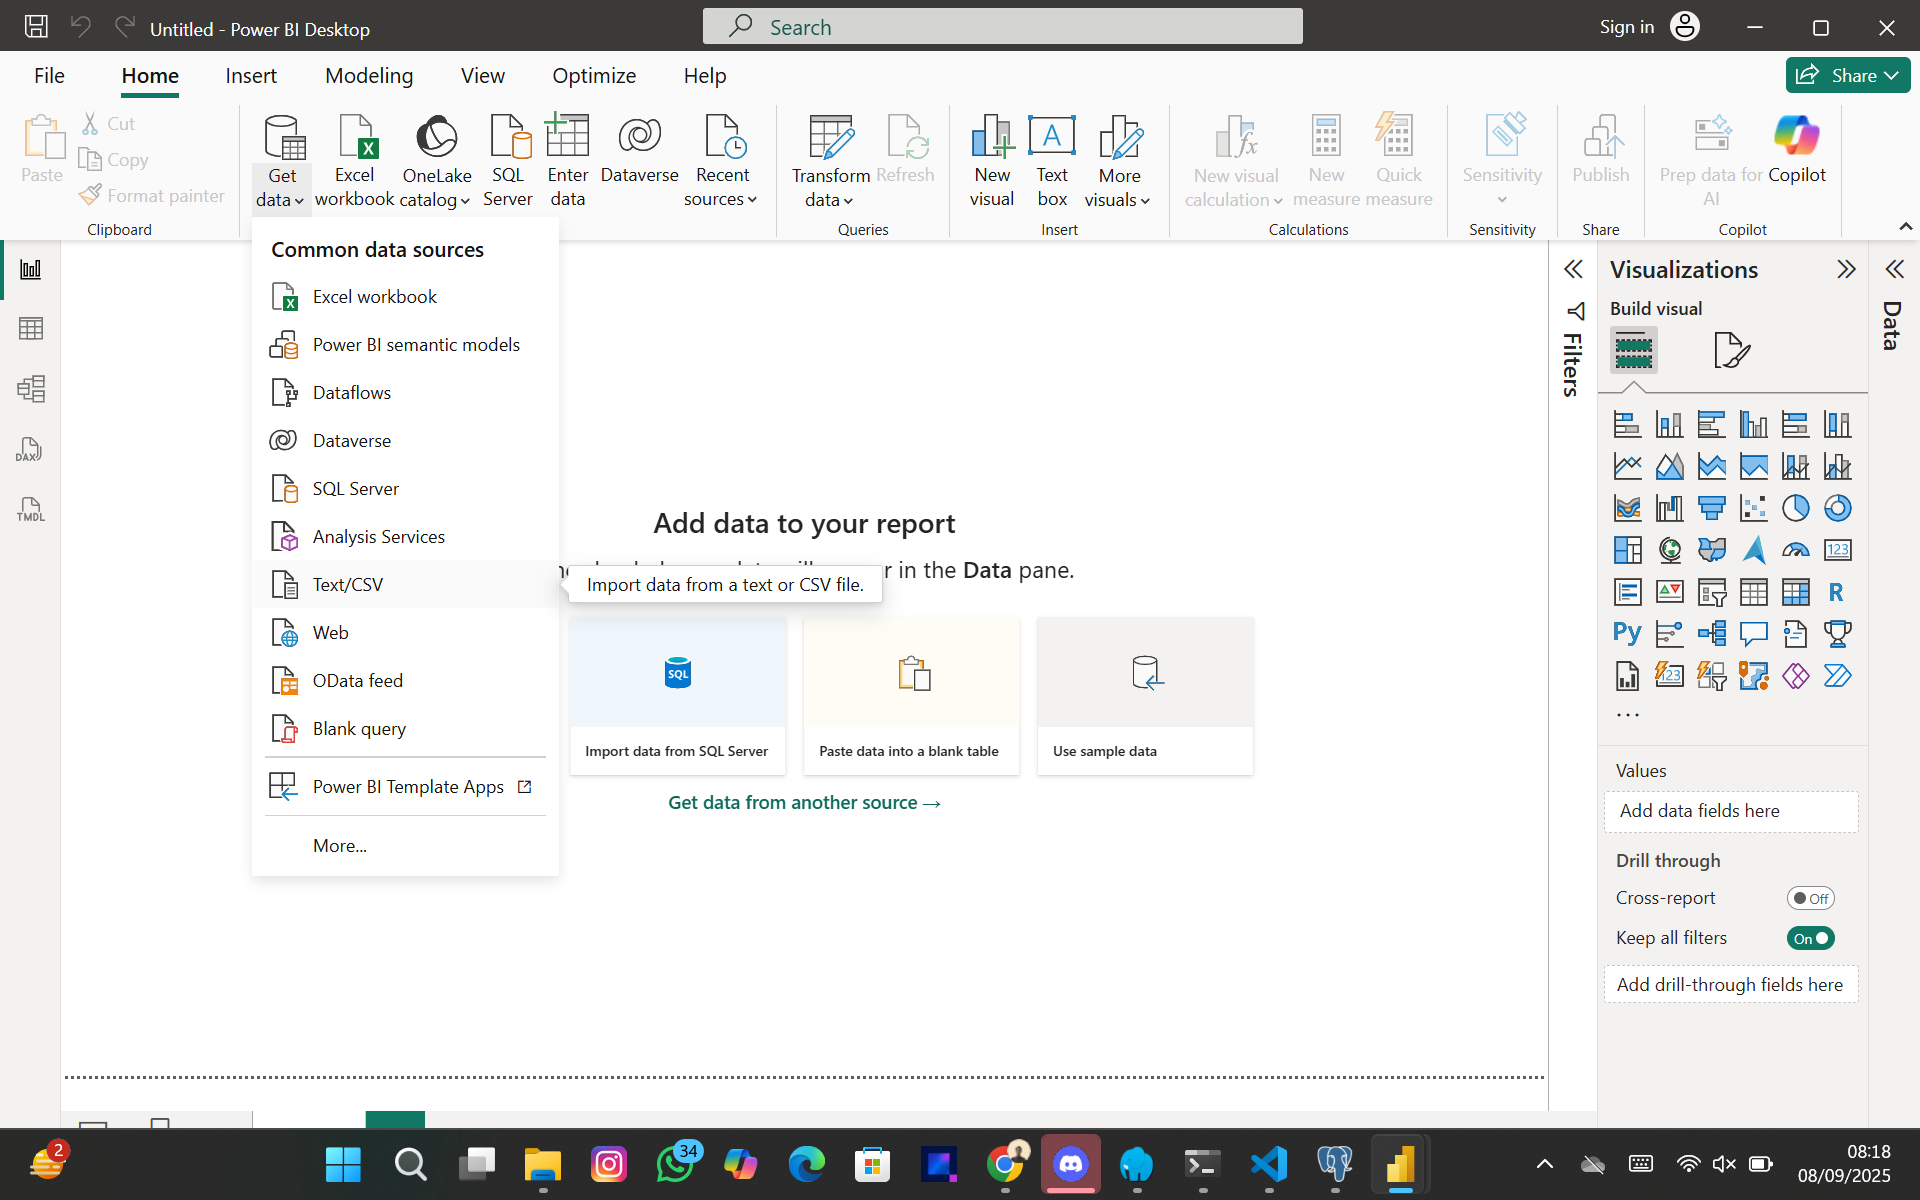


5. Server → localhost:5432 ,password : "password anda",user:"postgres",
6. Database → example: psd
7. Klik OK.

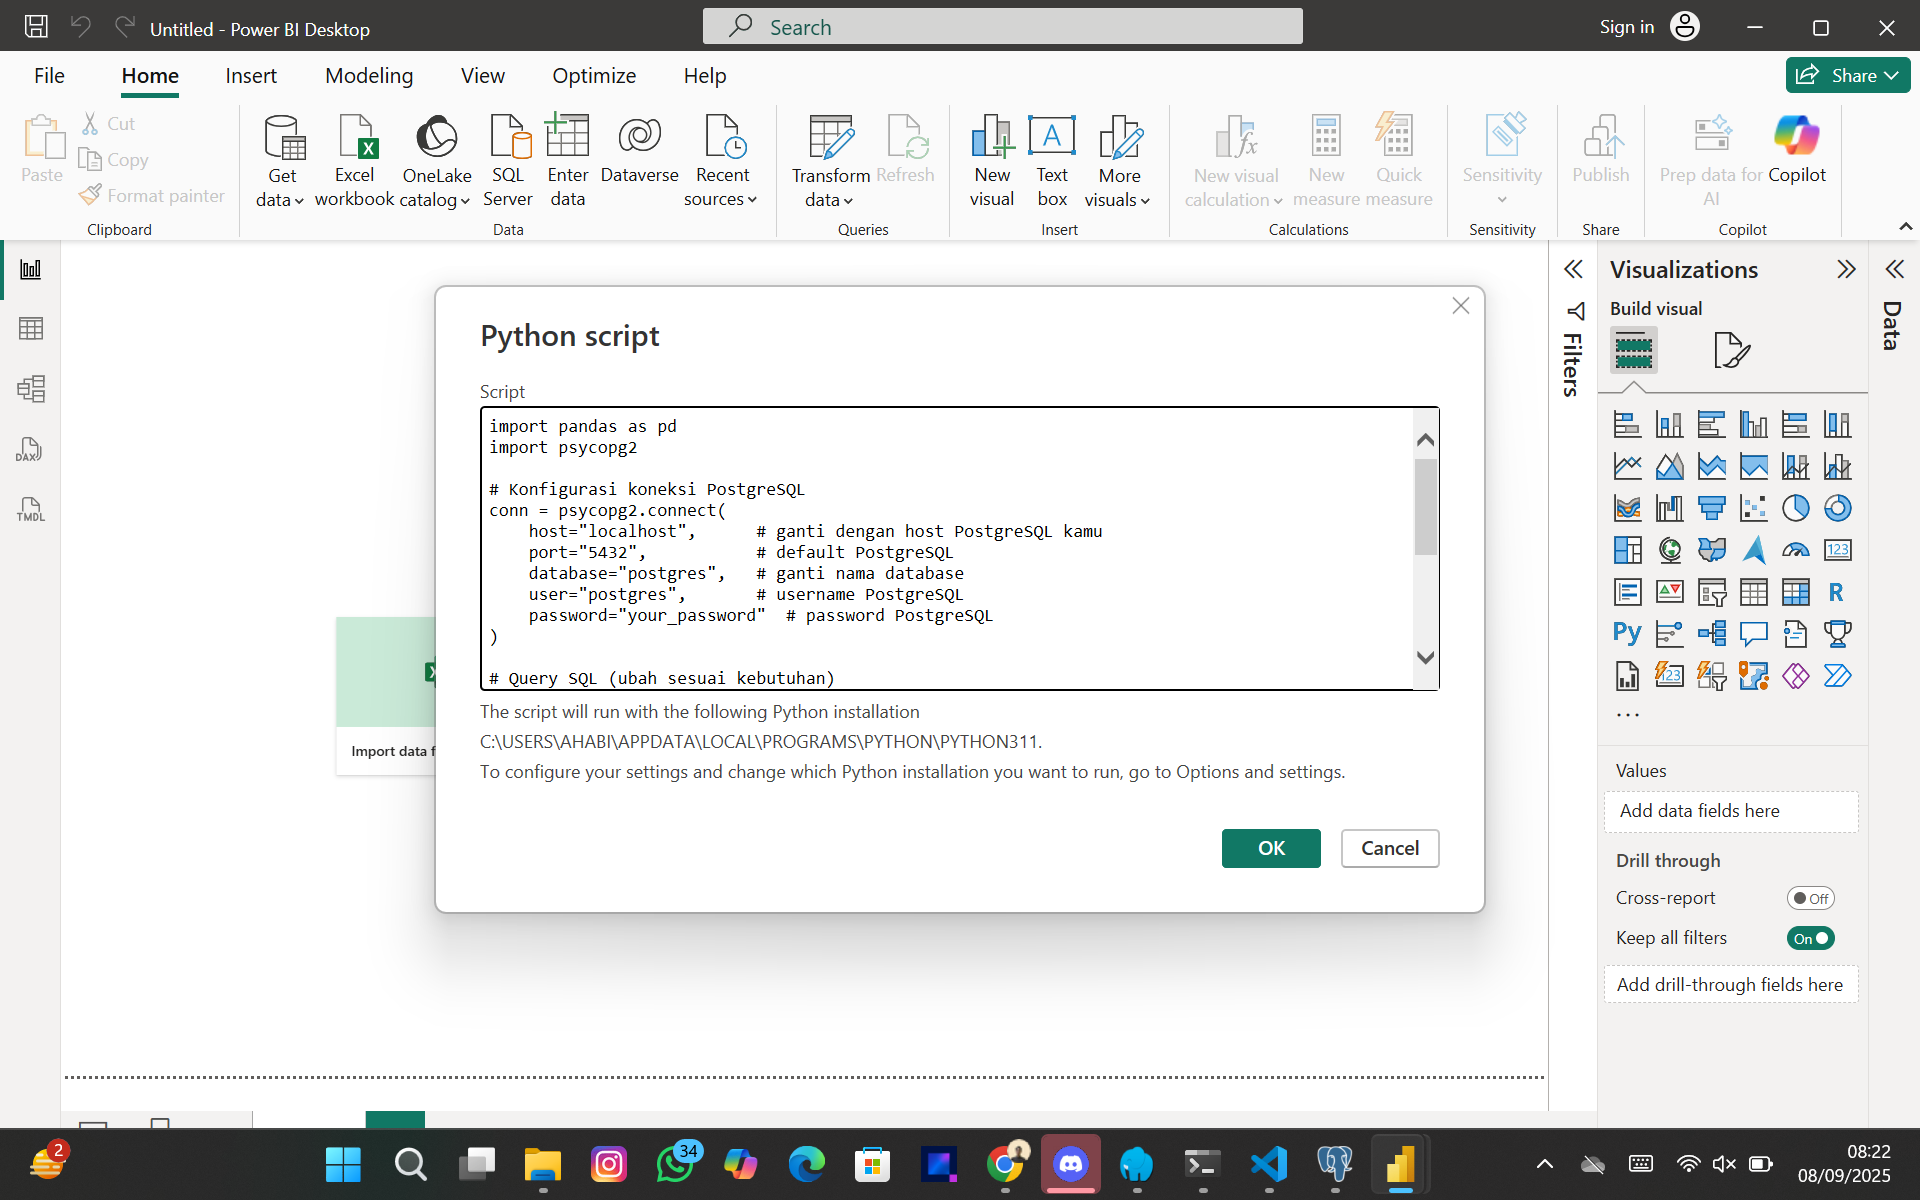


### Setup Database PostgreSQL (Konfigurasi,Koneksi,Create Table,Insert Data)
Sebelum kita bisa mengolah data di PostgreSQL, ada beberapa langkah penting yang perlu dilakukan. Pertama adalah konfigurasi. Pada tahap ini kita menyiapkan PostgreSQL di komputer, mulai dari proses instalasi hingga pengaturan username, password, dan port. Konfigurasi ini penting agar sistem database bisa dijalankan dan siap digunakan.

Setelah itu, kita masuk ke tahap koneksi. Koneksi berarti menghubungkan PostgreSQL dengan aplikasi lain, misalnya Python atau Power BI. Untuk membuat koneksi, kita perlu memasukkan informasi dasar seperti host, port, username, password, dan nama database. Dengan adanya koneksi ini, aplikasi bisa membaca dan menulis data di PostgreSQL.

Langkah berikutnya adalah create table. Tabel di PostgreSQL berfungsi seperti lembar kerja di Excel, tempat kita menyimpan data. Saat membuat tabel, kita harus menentukan nama tabel, kolom apa saja yang dibutuhkan, serta tipe data setiap kolom. Misalnya, kolom id untuk nomor unik, name untuk nama, dan age untuk usia.

Tahap terakhir adalah insert data. Di sinilah kita mulai mengisi tabel dengan data yang sudah ada. Data bisa dimasukkan dengan mengetik langsung perintah SQL INSERT INTO, atau bisa juga diimpor dari file eksternal seperti CSV maupun Excel.

Dengan menyelesaikan empat tahap ini—konfigurasi, koneksi, membuat tabel, dan memasukkan data—database PostgreSQL sudah siap dipakai untuk eksplorasi maupun analisis data lebih lanjut.

In [3]:
# 1. Impor semua library yang dibutuhkan di awal
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

# 2. Muat variabel dari file .env
load_dotenv()

# Ambil kredensial untuk PostgreSQL
user_postgres = os.getenv("USER_POSTGRES")
password_postgres = os.getenv("PASS_POSTGRES")
host_postgres = os.getenv("HOST_POSTGRES")
port_postgres = os.getenv("PORT_POSTGRES")
db_postgres = os.getenv("DB_POSTGRES")

# 3. Siapkan koneksi dan buat engine PostgreSQL
postgres_conn_str = f"postgresql+psycopg2://{user_postgres}:{password_postgres}@{host_postgres}:{port_postgres}/{db_postgres}"
postgres_engine = create_engine(postgres_conn_str)

# 4. Jalankan kueri dan ambil data
query_smartphone = "SELECT * FROM data_smartphone;"

print("Mengambil data dari PostgreSQL...")
data_postgres = pd.read_sql(query_smartphone, postgres_engine)

# 5. Tampilkan hasil (opsional, untuk verifikasi)
print("\n--- Data dari PostgreSQL (5 baris pertama) ---")
print(data_postgres.head())


Mengambil data dari PostgreSQL...


OperationalError: (psycopg2.OperationalError) could not translate host name "pg-35a34f4-ahabirabdi-7cbf.k.aivencloud.com" to address: Name or service not known

(Background on this error at: https://sqlalche.me/e/20/e3q8)

### EDA - Tipe Data dan Missing Values
Exploratory Data Analysis (EDA) pada bagian tipe data dan missing values bertujuan untuk memahami struktur awal dataset sebelum dilakukan analisis lebih lanjut. Tipe data penting untuk diketahui karena setiap kolom memiliki karakteristik yang berbeda, misalnya angka (numerik), teks (string), atau tanggal (datetime), sehingga memengaruhi cara pengolahan datanya. Sementara itu, pengecekan missing values dilakukan untuk melihat apakah ada data yang kosong atau tidak terisi. Data yang hilang ini perlu ditangani, karena jika dibiarkan bisa menimbulkan bias atau error dalam proses analisis dan pemodelan. Dengan memahami tipe data serta keberadaan missing values sejak awal, kita bisa menentukan langkah pembersihan (data cleaning) yang tepat agar analisis berikutnya lebih akurat.

In [4]:
# 6. Cek tipe data tiap kolom
print("\n--- Tipe data tiap kolom ---")
print(data_postgres.dtypes)

# Kalau mau lebih rapi, bisa pakai info()
print("\n--- Info DataFrame ---")
print(data_postgres.info())


--- Tipe data tiap kolom ---
brand_name                    object
model                         object
price                        float64
avg_rating                   float64
5G_or_not                    float64
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available      float64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                 float64
num_rear_cameras             float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available    float64
resolution_height            float64
resolution_width             float64
dtype: object

--- Info DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column  

In [5]:
print("\n--- Jumlah missing value per kolom ---")
print(data_postgres.isnull().sum())

print("\n--- Apakah ada kolom yang punya missing value? ---")
print(data_postgres.isnull().any())

print("\n--- Total missing value di seluruh DataFrame ---")
print(data_postgres.isnull().sum().sum())


--- Jumlah missing value per kolom ---
brand_name                     0
model                         34
price                         34
avg_rating                   127
5G_or_not                     34
processor_brand               34
num_cores                     40
processor_speed               67
battery_capacity              45
fast_charging_available       34
fast_charging                228
ram_capacity                  34
internal_memory               34
screen_size                   34
refresh_rate                  34
num_rear_cameras              34
os                            34
primary_camera_rear           34
primary_camera_front          37
extended_memory_available     34
resolution_height             34
resolution_width              34
dtype: int64

--- Apakah ada kolom yang punya missing value? ---
brand_name                   False
model                         True
price                         True
avg_rating                    True
5G_or_not                    

### EDA - Outlier Analisis dengan IQR
Pada tahap EDA - Outlier Analisis dengan IQR, kita mencoba mendeteksi data yang nilainya menyimpang jauh dari mayoritas data lainnya dengan menggunakan metode Interquartile Range (IQR). IQR dihitung dari selisih antara kuartil atas (Q3) dan kuartil bawah (Q1), lalu digunakan untuk menentukan batas bawah dan batas atas. Data yang berada di luar rentang tersebut dianggap sebagai outlier. Analisis ini penting karena outlier bisa memengaruhi hasil analisis dan membuat kesimpulan menjadi tidak akurat, sehingga perlu dipahami apakah outlier tersebut wajar (misalnya kasus khusus) atau justru perlu dibersihkan.

In [6]:
import numpy as np

# 8. Deteksi outlier dengan metode IQR
print("\n--- Analisis Outlier dengan IQR ---")

# Ambil hanya kolom numerik
numeric_cols = data_postgres.select_dtypes(include=[np.number]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = data_postgres[col].quantile(0.25)
    Q3 = data_postgres[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_postgres[(data_postgres[col] < lower_bound) | (data_postgres[col] > upper_bound)]
    
    outlier_summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Jumlah Outlier": len(outliers)
    }

# Ubah hasil ke DataFrame biar rapi
outlier_df = pd.DataFrame(outlier_summary).T

print(outlier_df)



--- Analisis Outlier dengan IQR ---
                                 Q1        Q3       IQR  Lower Bound  \
price                      12999.00  34999.00  22000.00   -20001.000   
avg_rating                     7.40      8.40      1.00        5.900   
5G_or_not                      0.00      1.00      1.00       -1.500   
num_cores                      8.00      8.00      0.00        8.000   
processor_speed                2.05      2.84      0.79        0.865   
battery_capacity            4500.00   5000.00    500.00     3750.000   
fast_charging_available        1.00      1.00      0.00        1.000   
fast_charging                 18.00     66.00     48.00      -54.000   
ram_capacity                   4.00      8.00      4.00       -2.000   
internal_memory               64.00    128.00     64.00      -32.000   
screen_size                    6.50      6.67      0.17        6.245   
refresh_rate                  60.00    120.00     60.00      -30.000   
num_rear_cameras           

### EDA - Konsistensi Data dan Duplikat
Pada tahap EDA - Konsistensi Data dan Duplikat, fokusnya adalah memastikan bahwa data yang digunakan tidak memiliki kejanggalan seperti format yang tidak seragam (misalnya penulisan “Yes” dan “YES” pada kolom kategori) serta tidak ada baris data yang tercatat lebih dari sekali. Data duplikat bisa menimbulkan bias karena informasi yang sama dihitung berkali-kali, sedangkan inkonsistensi bisa membuat analisis sulit dilakukan. Oleh karena itu, langkah ini penting untuk membersihkan data agar hasil analisis lebih akurat dan dapat dipercaya.

In [7]:
# 9. Analisis konsistensi data & cek duplikat

print("\n--- Cek Duplikat Data ---")
# Cek jumlah baris duplikat
duplicate_rows = data_postgres.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

# Jika mau lihat baris duplikat detail
if duplicate_rows > 0:
    print("\nBaris duplikat (contoh):")
    print(data_postgres[data_postgres.duplicated()].head())

print("\n--- Cek Unik pada Kolom Kunci ---")
# Misalnya model + brand_name dianggap unik
if "brand_name" in data_postgres.columns and "model" in data_postgres.columns:
    duplicate_models = data_postgres.duplicated(subset=["brand_name", "model"]).sum()
    print(f"Jumlah duplikat berdasarkan kombinasi brand_name & model: {duplicate_models}")

print("\n--- Cek Rentang Nilai Numerik ---")
numeric_cols = data_postgres.select_dtypes(include=[np.number]).columns

range_summary = {}
for col in numeric_cols:
    min_val = data_postgres[col].min()
    max_val = data_postgres[col].max()
    range_summary[col] = {"Min": min_val, "Max": max_val}

range_df = pd.DataFrame(range_summary).T
print(range_df)



--- Cek Duplikat Data ---
Jumlah baris duplikat: 0

--- Cek Unik pada Kolom Kunci ---
Jumlah duplikat berdasarkan kombinasi brand_name & model: 0

--- Cek Rentang Nilai Numerik ---
                               Min        Max
price                      3499.00  650000.00
avg_rating                    6.00       8.90
5G_or_not                     0.00       1.00
num_cores                     4.00       8.00
processor_speed               1.20       3.22
battery_capacity           1821.00   22000.00
fast_charging_available       0.00       1.00
fast_charging                10.00     240.00
ram_capacity                  1.00      18.00
internal_memory               8.00    1024.00
screen_size                   3.54       8.03
refresh_rate                 60.00     240.00
num_rear_cameras              1.00       4.00
primary_camera_rear           2.00     200.00
primary_camera_front          0.00      60.00
extended_memory_available     0.00       1.00
resolution_height           480.00  

### EDA - Statistik Deskriptif dan Visualisasi
Statistik deskriptif digunakan untuk memahami gambaran umum dari data, seperti nilai rata-rata, minimum, maksimum, hingga sebaran (distribusi) pada setiap kolom numerik. Dengan cara ini, kita bisa melihat tren dasar, pola, dan potensi anomali dalam data. Selain itu, visualisasi seperti histogram atau boxplot membantu memperjelas distribusi nilai, apakah data menyebar merata, condong ke satu sisi, atau memiliki outlier. Jadi, statistik deskriptif dan visualisasi ini berfungsi sebagai langkah awal untuk mengenali karakteristik dataset sebelum dilakukan analisis lebih lanjut.


--- Statistik Deskriptif Data Numerik ---
                           count          mean           std      min  \
price                      946.0  31939.926004  39071.589458  3499.00   
avg_rating                 853.0      7.835522      0.726650     6.00   
5G_or_not                  946.0      0.564482      0.496087     0.00   
num_cores                  940.0      7.793617      0.785899     4.00   
processor_speed            913.0      2.430909      0.455751     1.20   
battery_capacity           935.0   4821.677005   1000.903782  1821.00   
fast_charging_available    946.0      0.859408      0.347784     0.00   
fast_charging              752.0     46.208777     34.419365    10.00   
ram_capacity               946.0      6.562368      2.706219     1.00   
internal_memory            946.0    140.659619    105.499670     8.00   
screen_size                946.0      6.533584      0.330983     3.54   
refresh_rate               946.0     92.749471     28.737963    60.00   
num_rear

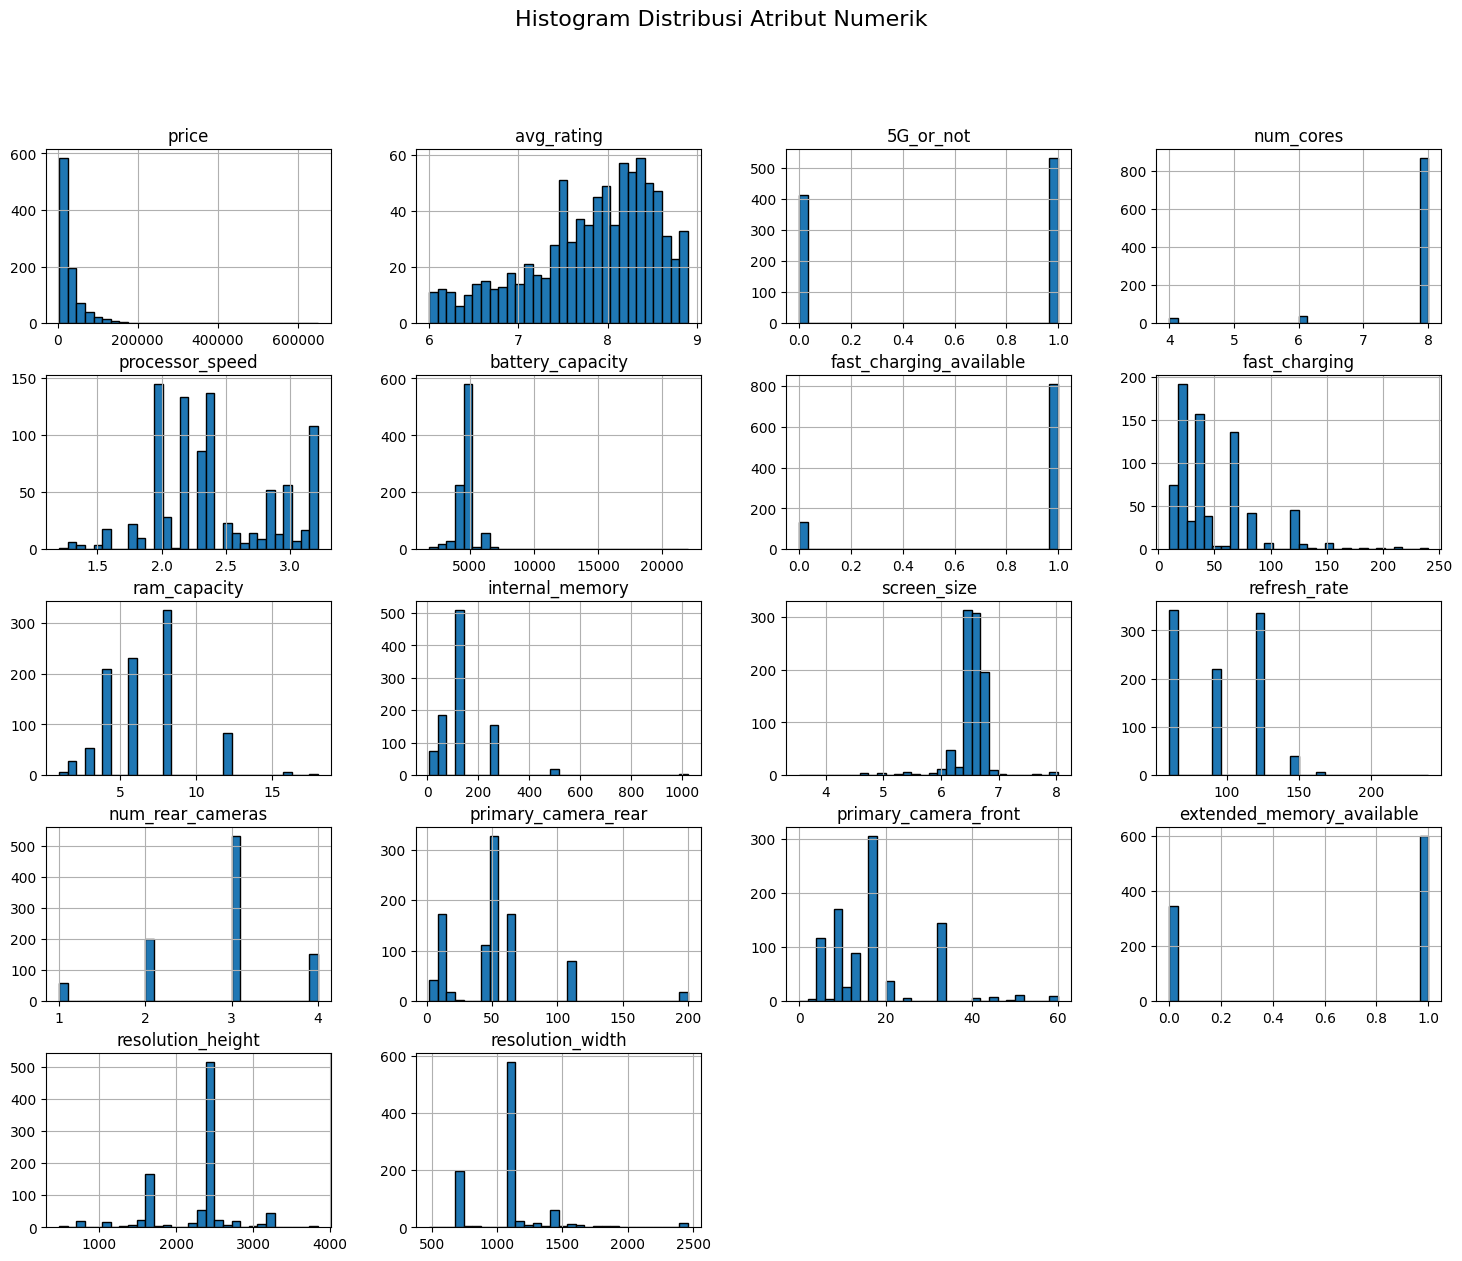


Membuat boxplot untuk mendeteksi outlier...


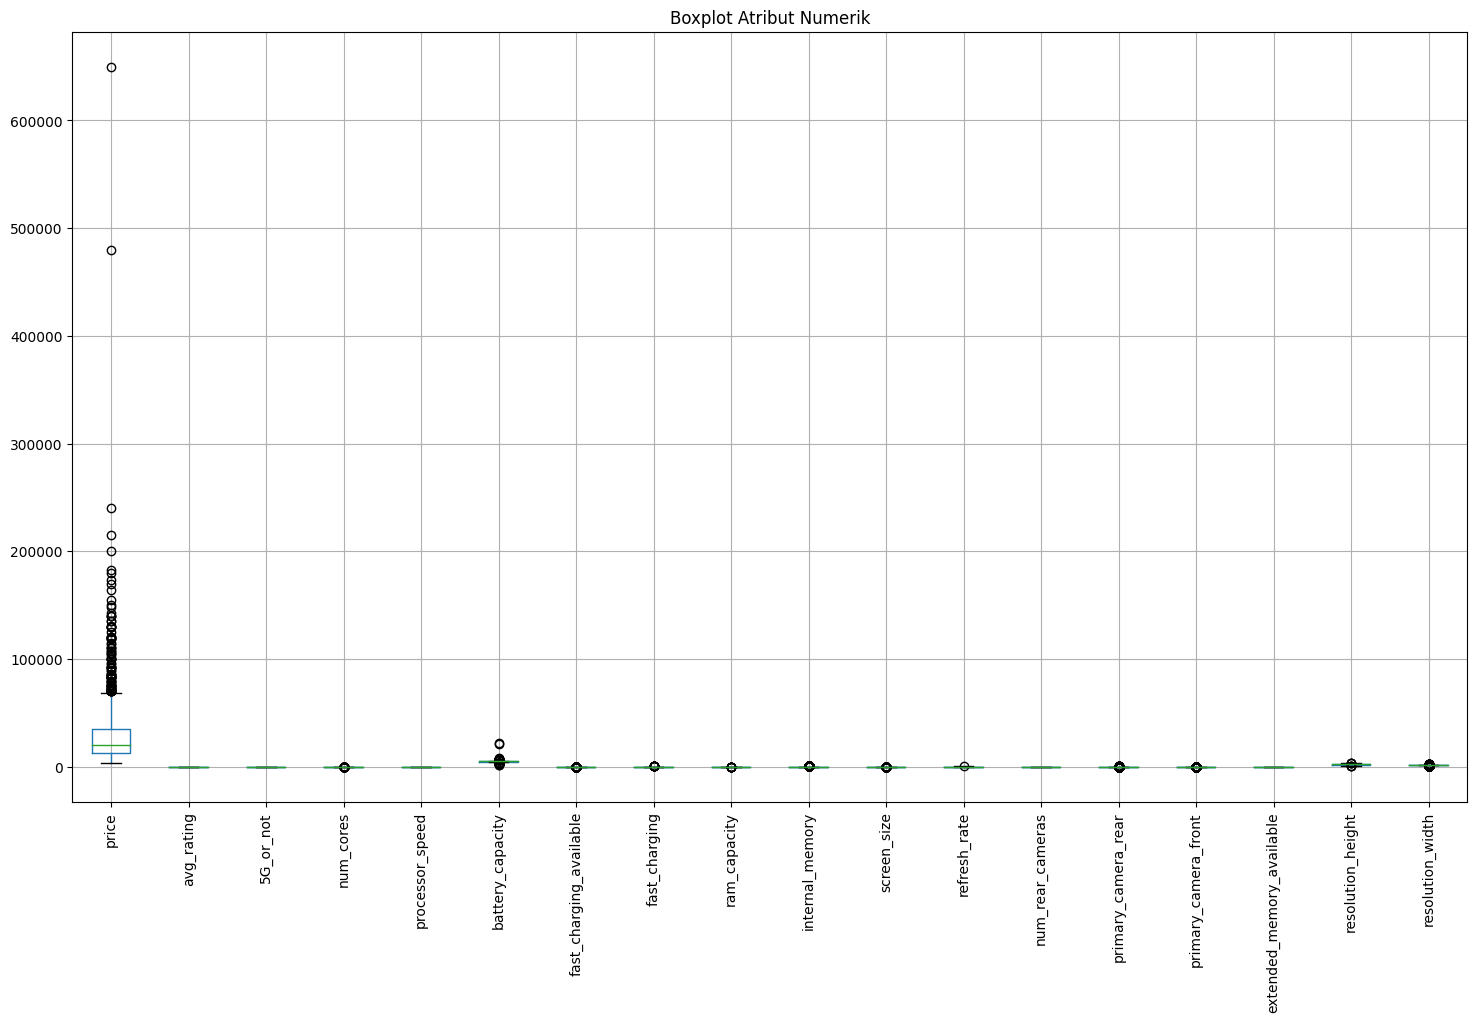


Membuat heatmap korelasi...


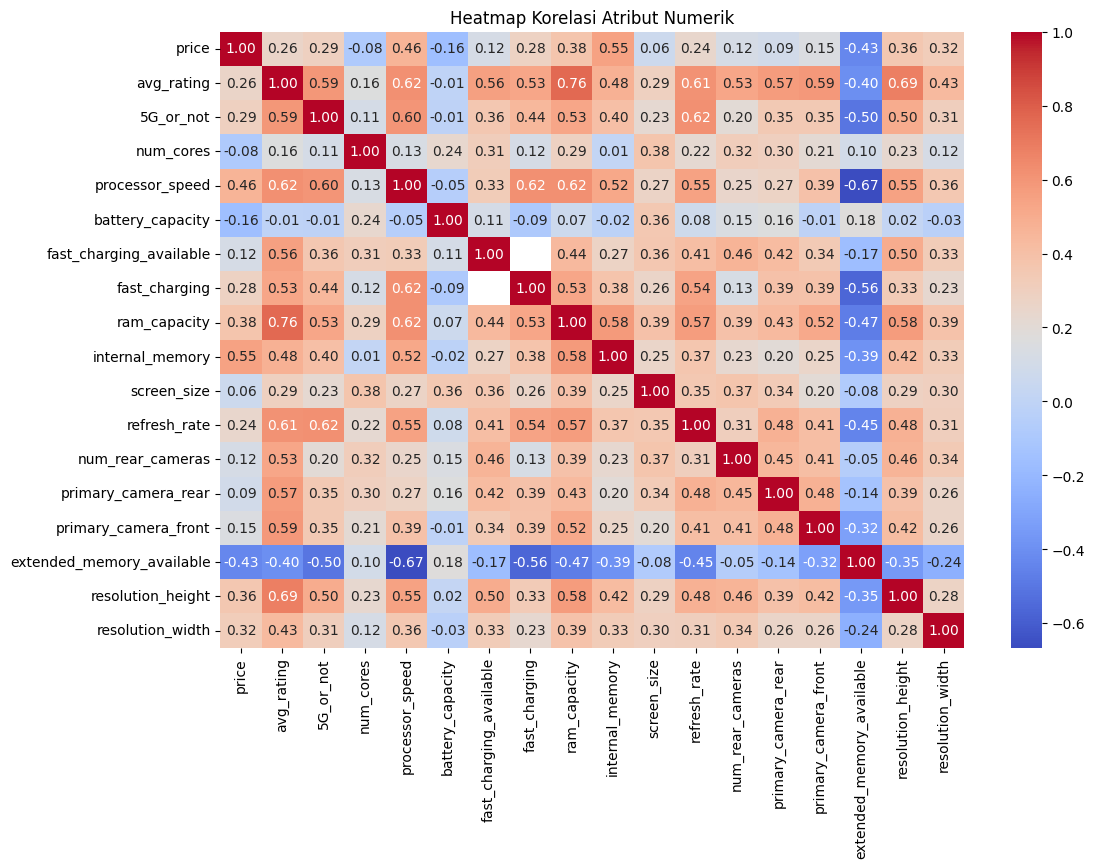

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 10. Statistik Deskriptif
print("\n--- Statistik Deskriptif Data Numerik ---")
desc_stats = data_postgres.describe().T  # Transpose biar lebih mudah dibaca
print(desc_stats)

# 11. Visualisasi

# 11a. Histogram untuk distribusi tiap kolom numerik
print("\nMembuat histogram untuk distribusi data...")
data_postgres.hist(bins=30, figsize=(18, 14), edgecolor='black')
plt.suptitle("Histogram Distribusi Atribut Numerik", fontsize=16)
plt.show()

# 11b. Boxplot untuk melihat outlier per kolom numerik
print("\nMembuat boxplot untuk mendeteksi outlier...")
plt.figure(figsize=(18, 10))
data_postgres.select_dtypes(include=['float64', 'int64']).boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot Atribut Numerik")
plt.show()

# 11c. Heatmap korelasi antar variabel numerik
print("\nMembuat heatmap korelasi...")
plt.figure(figsize=(12, 8))
corr = data_postgres.corr(numeric_only=True)  # hanya numerik
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()


### EDA - Menggunakan Power BI

#### - Type Data
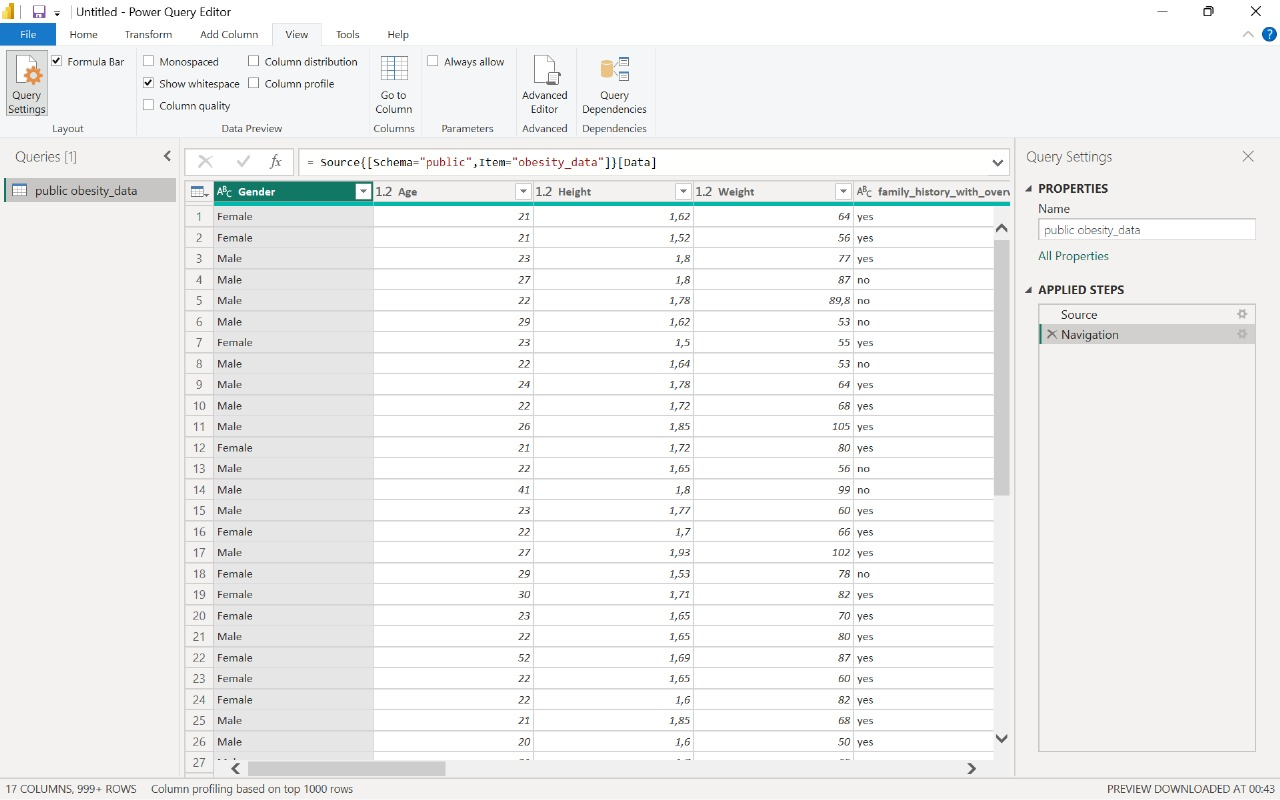


#### - Missing Values

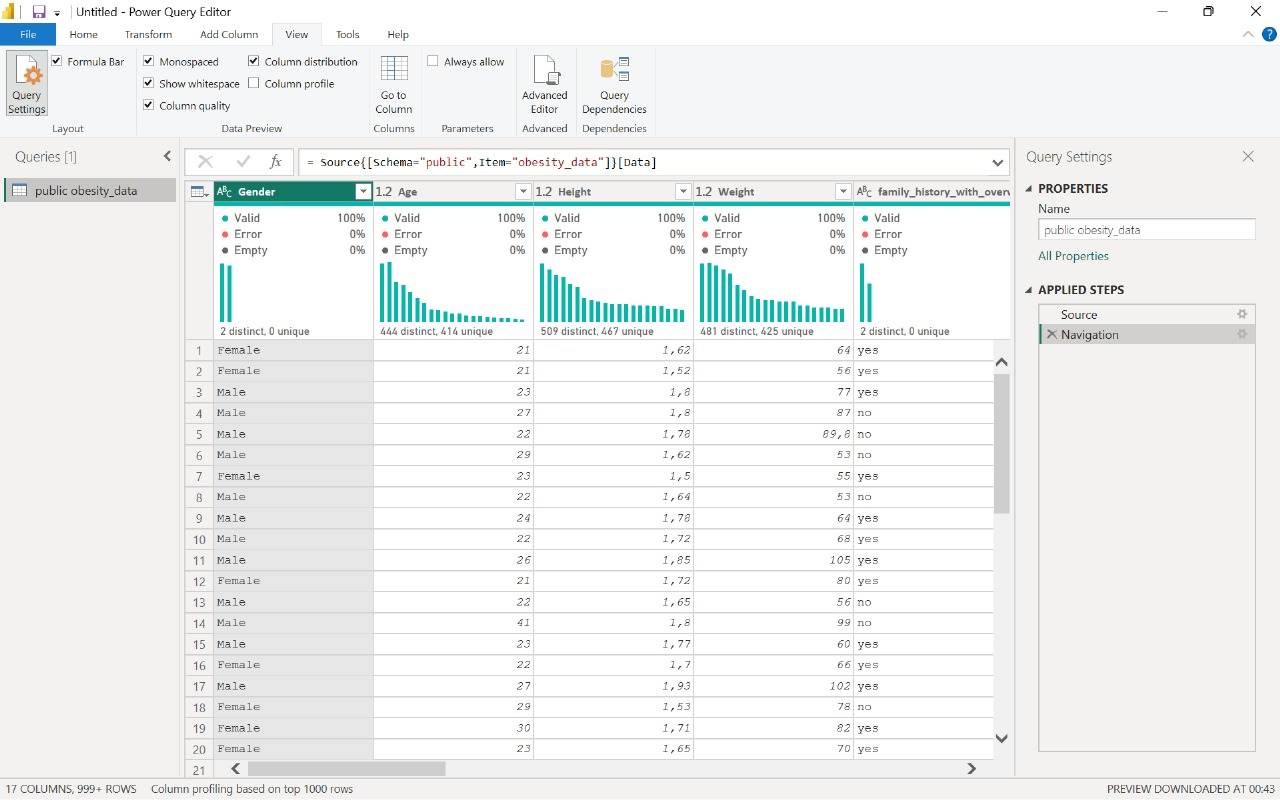

#### - Konsistensi Data
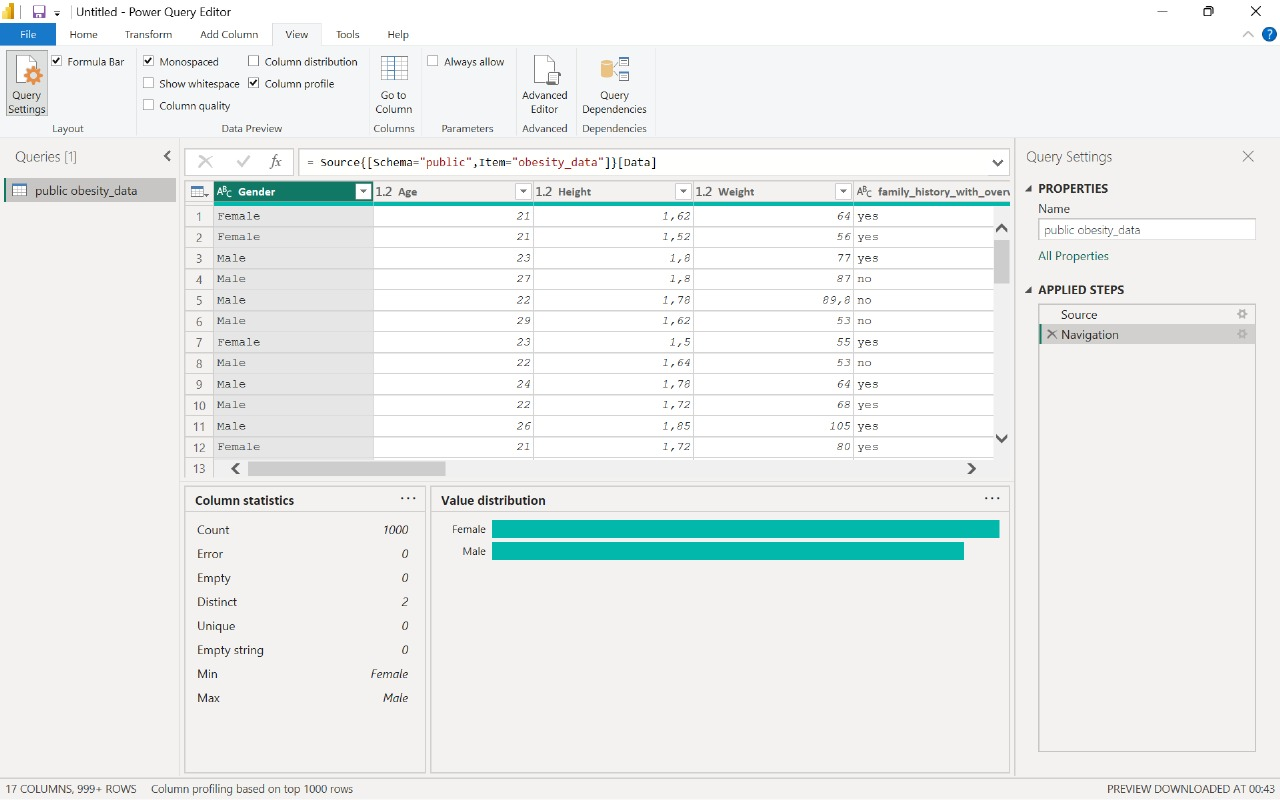


#### - Outlier Analisis
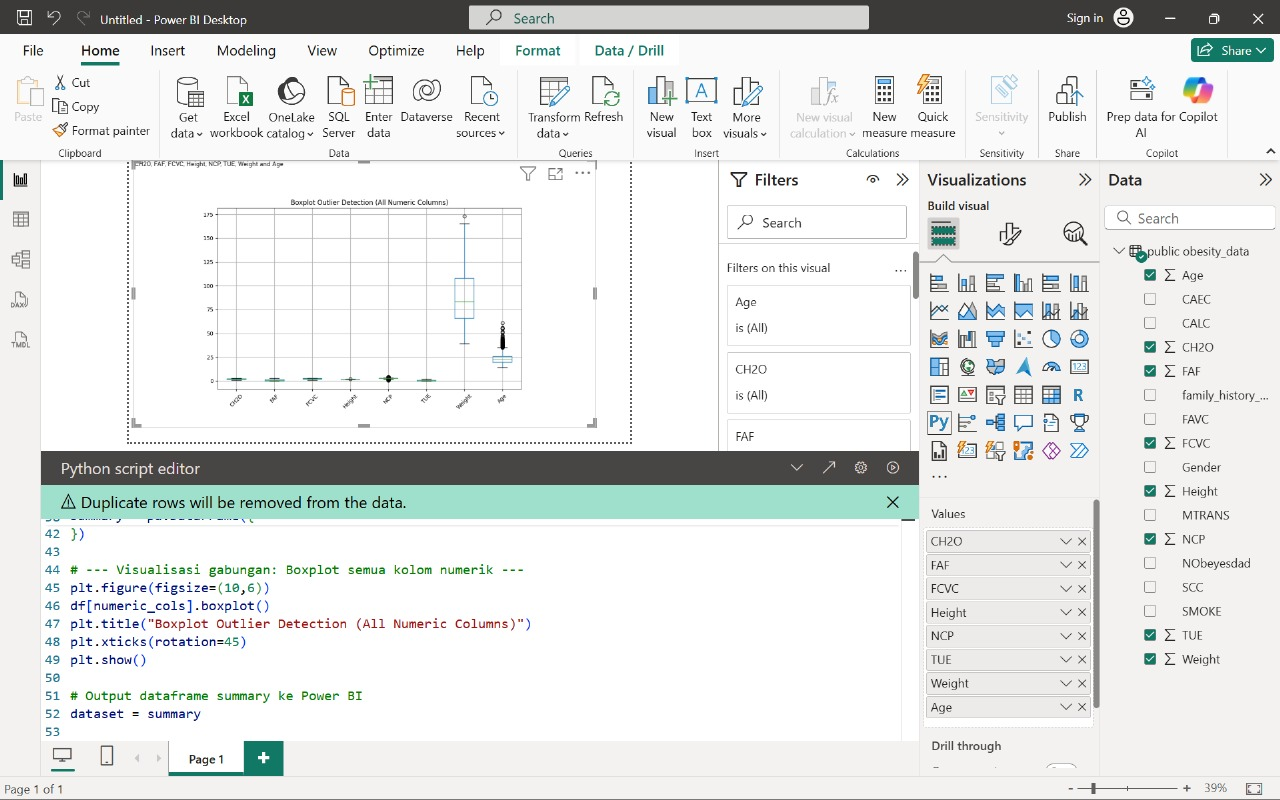


### EDA - Menggunakan Power BI

#### - Type Data dan Missing Values


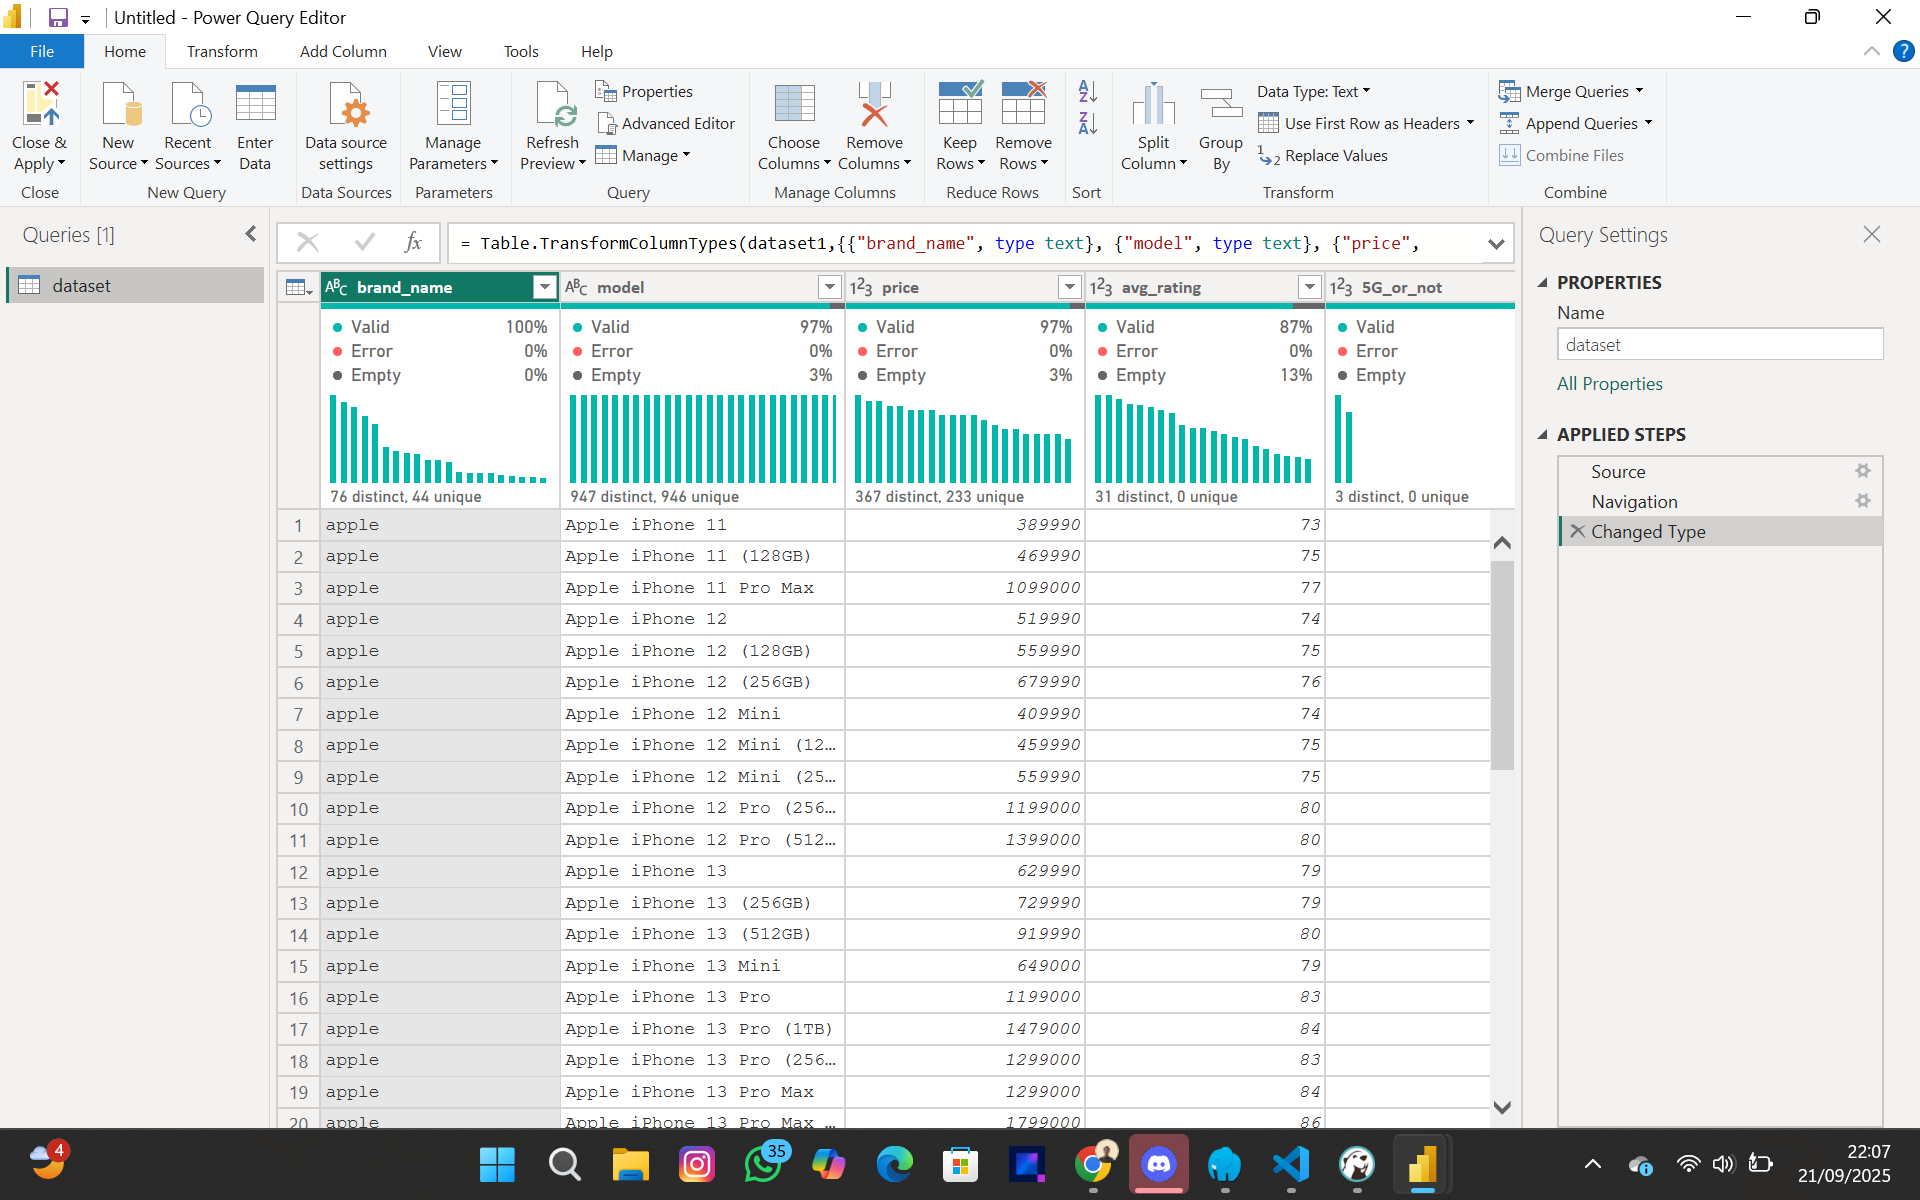

#### - Konsistensi Data

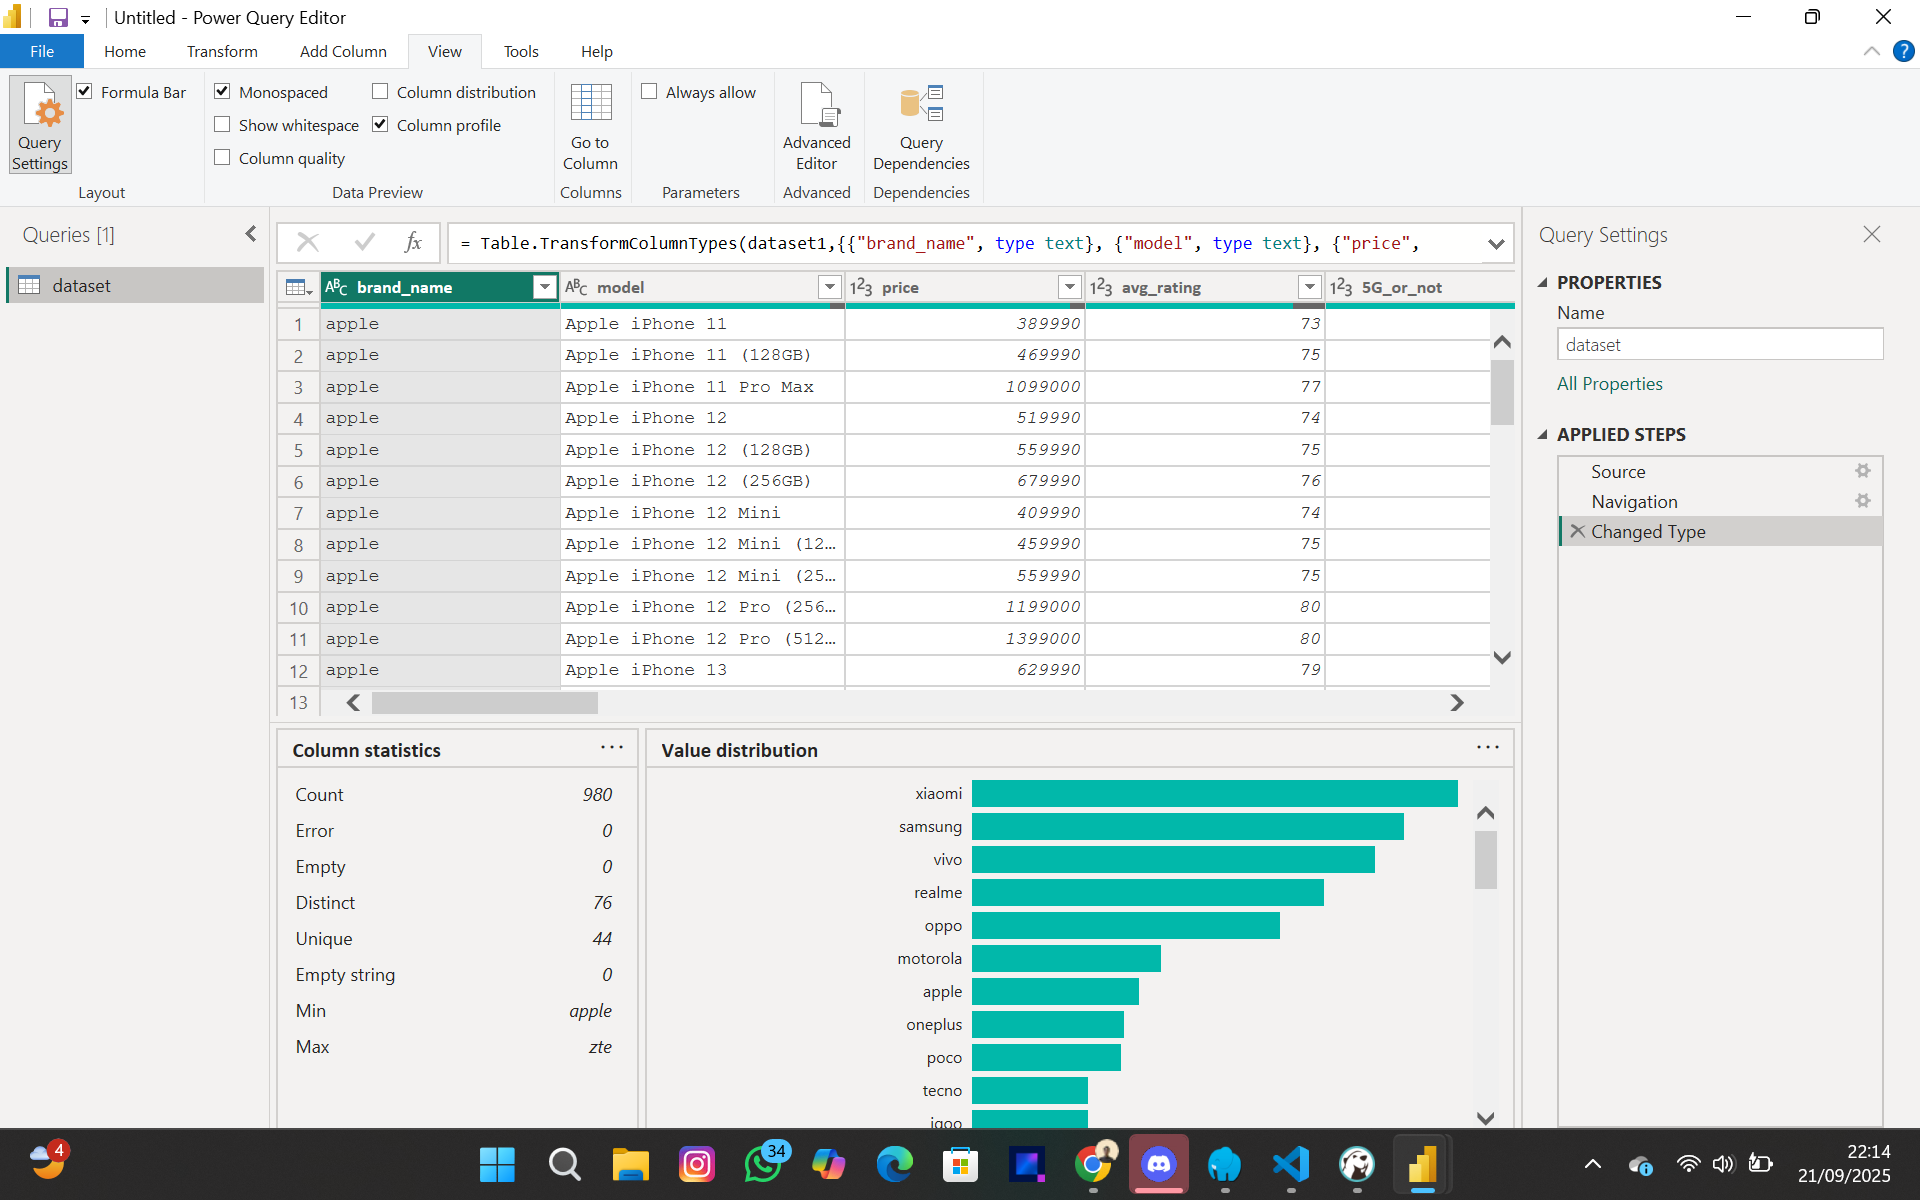

#### - Analisis Outlier

In [11]:
import pandas as pd
import numpy as np

# Copy dataset dari Power BI
df = data_postgres.copy()

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

# DataFrame untuk flag outlier
outlier_flags = pd.DataFrame(index=df.index)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_flags[col + "_outlier"] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

# Gabungkan kembali ke dataset
df_outlier = pd.concat([df, outlier_flags], axis=1)

# Reset index biar Power BI tidak error
df_outlier = df_outlier.reset_index(drop=True)

# Output ke Power BI
dataset = df_outlier


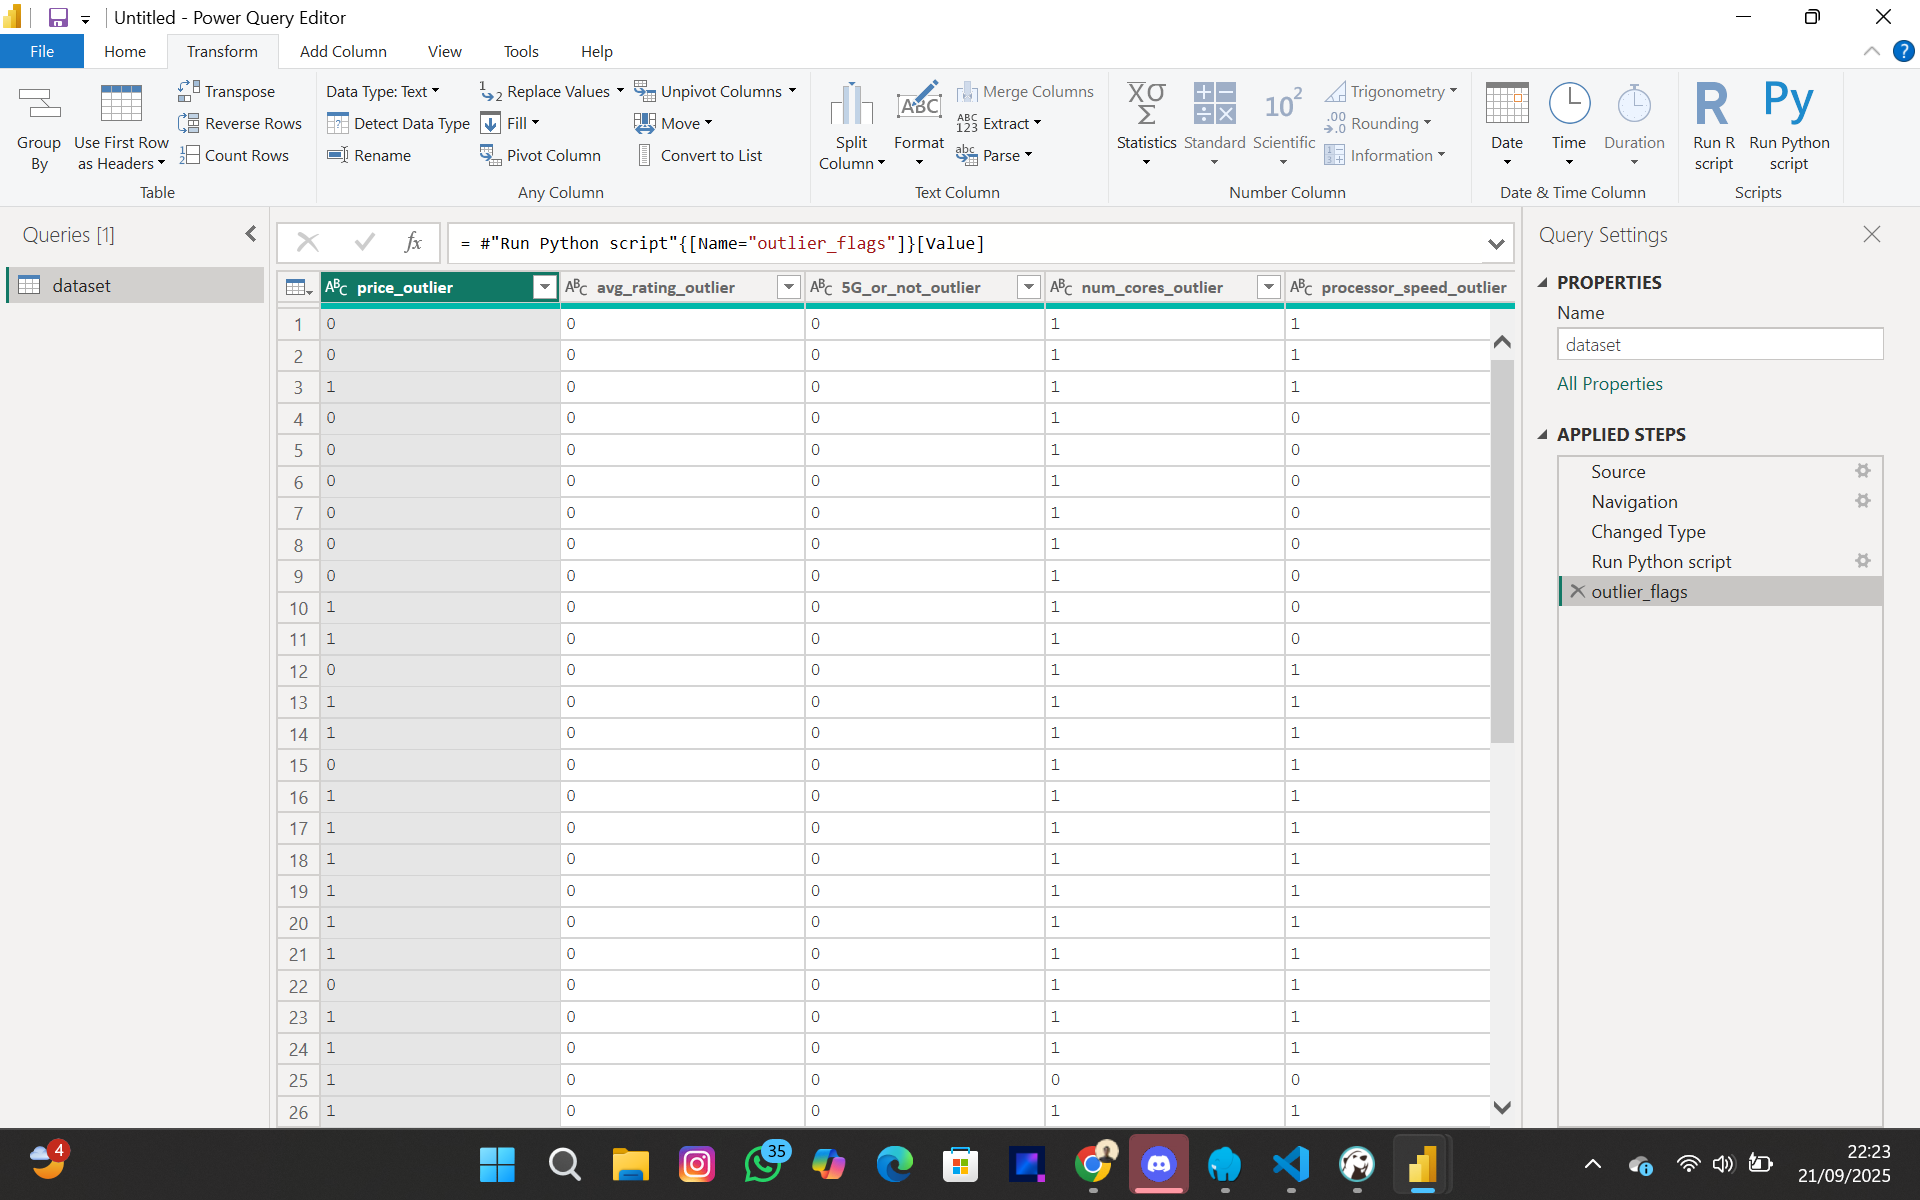